# Análisis de Ventas Mensuales

En este análisis, hemos utilizado los datos de ventas para visualizar las tendencias mensuales. El objetivo es identificar patrones o fluctuaciones en las ventas a lo largo de diferentes meses, lo cual puede ser útil para la planificación de inventarios y estrategias de marketing.

## Preparación de los Datos

Primero, se realizó la conversión de la columna `InvoiceDate` al formato de fecha y se creó una nueva columna `YearMonth` para representar el año y el mes. Posteriormente, se agruparon las ventas mensuales sumando la cantidad vendida en cada período.

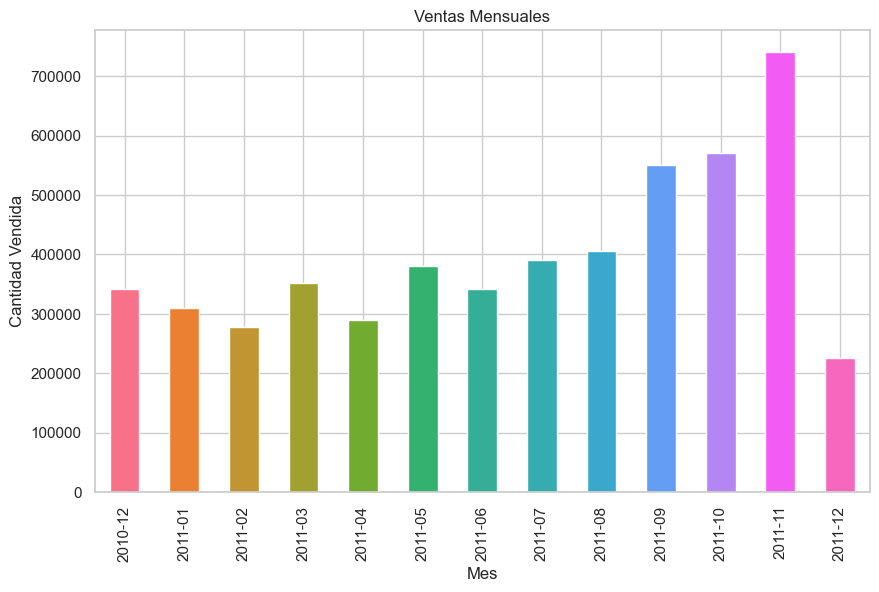

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir la columna 'InvoiceDate' a formato de fecha
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Crear una nueva columna para el año y el mes
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Agrupar por año y mes y sumar las cantidades vendidas
monthly_sales = data.groupby('YearMonth')['Quantity'].sum()

# Visualizar las ventas mensuales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color=sns.color_palette('husl', len(monthly_sales)))
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.show()


# Análisis de Correlación entre Precio Total y Cantidad Vendida

En este análisis, se explora la relación entre el precio total de los productos y la cantidad vendida utilizando datos de comercio electrónico. Identificar correlaciones entre estas variables es fundamental para comprender mejor el comportamiento de las ventas y optimizar estrategias comerciales.

## Preparación de los Datos

Se comenzó cargando el dataset y convirtiendo la columna `InvoiceDate` al formato de fecha. Luego, se crearon nuevas columnas para facilitar el análisis, asegurándose de que las variables `Quantity` y `UnitPrice` fueran de tipo numérico. Se calculó el precio total por producto y se filtraron los datos para remover valores negativos, asegurando así la integridad del análisis.


            Quantity  TotalPrice
Quantity    1.000000    0.658519
TotalPrice  0.658519    1.000000


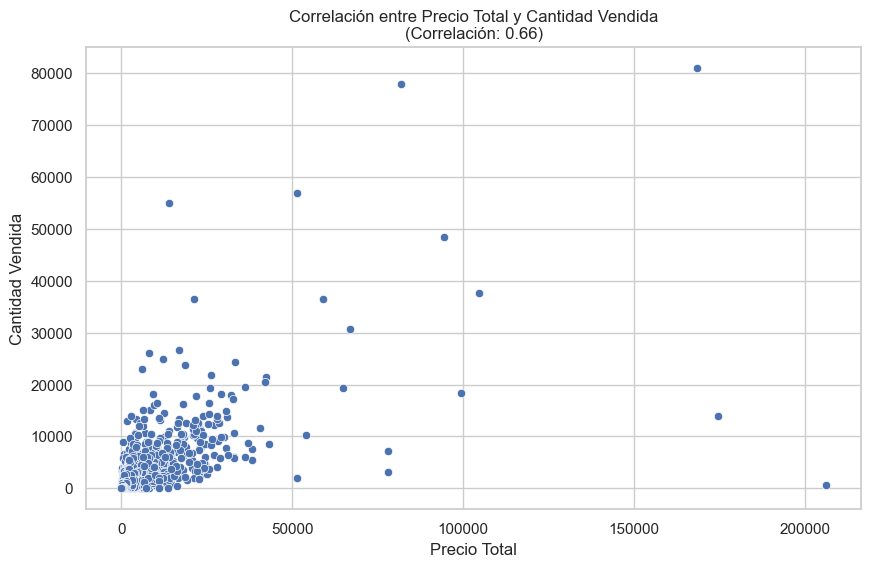

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data_filepath = '..data/data.csv'
data = pd.read_csv(data_filepath, encoding='ISO-8859-1')

# Convertir la columna 'InvoiceDate' a formato de fecha
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Crear una nueva columna para el año y el mes
data['YearMonth'] = data['InvoiceDate'].dt.to_period('M')

# Asegurarse de que 'Quantity' y 'UnitPrice' son de tipo numérico
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

# Calcular el ingreso total por producto
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

# Filtrar los datos para remover valores negativos
data = data[(data['Quantity'] > 0) & (data['TotalPrice'] > 0)]

# Agrupar por producto y calcular la correlación
product_sales = data.groupby('StockCode').agg({'Quantity': 'sum', 'TotalPrice': 'sum'})
correlation = product_sales.corr()
print(correlation)

# Visualizar la correlación
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPrice', y='Quantity', data=product_sales)
plt.title('Correlación entre Precio Total y Cantidad Vendida\n(Correlación: {:.2f})'.format(correlation.loc['Quantity', 'TotalPrice']))
plt.xlabel('Precio Total')
plt.ylabel('Cantidad Vendida')
plt.show()


## Preparación de los Datos

El proceso comienza con la carga del dataset y la conversión de la columna que contiene las fechas de las transacciones al formato de fecha. Esto es esencial para trabajar con series temporales y permite realizar operaciones basadas en el tiempo, como la agrupación por meses y años.

A continuación, se crea una columna denominada `CohortMonth`, que identifica el mes y año en el que cada cliente realizó su primera compra. Esta columna es clave para el análisis de cohortes, ya que permite agrupar a los clientes según su "mes de cohorte", es decir, el mes en que se unieron al grupo de compradores.

También se añade una columna llamada `InvoiceMonth`, que indica el mes y año de cada transacción. Con esta información, es posible calcular cuántos meses han pasado desde la primera compra de cada cliente, lo que se captura en la columna `CohortIndex`. Esta última columna indica el "índice de cohorte" o el número de meses desde la primera compra.

Finalmente, se realiza un filtrado de los datos para eliminar cualquier registro con valores nulos en las columnas clave para garantizar la precisión del análisis.

## Análisis de Cohortes

Se agrupan los datos por mes de cohorte y por el índice de cohorte para calcular el número de clientes únicos que realizaron compras en cada mes subsiguiente. Este agrupamiento es fundamental para construir el análisis de cohortes, ya que permite observar cómo se comportan los clientes a lo largo del tiempo después de su primera compra.

El resultado de esta agrupación es una tabla que muestra el número de clientes que realizaron compras adicionales en cada mes posterior a su cohorte inicial. Esta tabla se transforma en una matriz donde cada fila representa un mes de cohorte y cada columna muestra los meses transcurridos desde la primera compra.

## Visualización de Resultados

Para visualizar el análisis de cohortes, se utiliza un mapa de calor que ilustra la retención de clientes a lo largo del tiempo. En este mapa de calor, las filas representan el mes de cohorte (el mes en que los clientes realizaron su primera compra), mientras que las columnas representan el número de meses transcurridos desde esa primera compra.

El color en el mapa de calor indica la proporción de clientes que continuaron comprando en los meses posteriores, con colores más oscuros indicando una mayor retención. Este tipo de visualización es útil para identificar patrones en la retención de clientes y para evaluar la efectividad de estrategias de fidelización.

Por ejemplo, un mapa de calor que muestra una alta retención en los primeros meses y una disminución gradual en meses posteriores puede indicar que los clientes están inicialmente satisfechos, pero que la retención a largo plazo podría mejorarse.

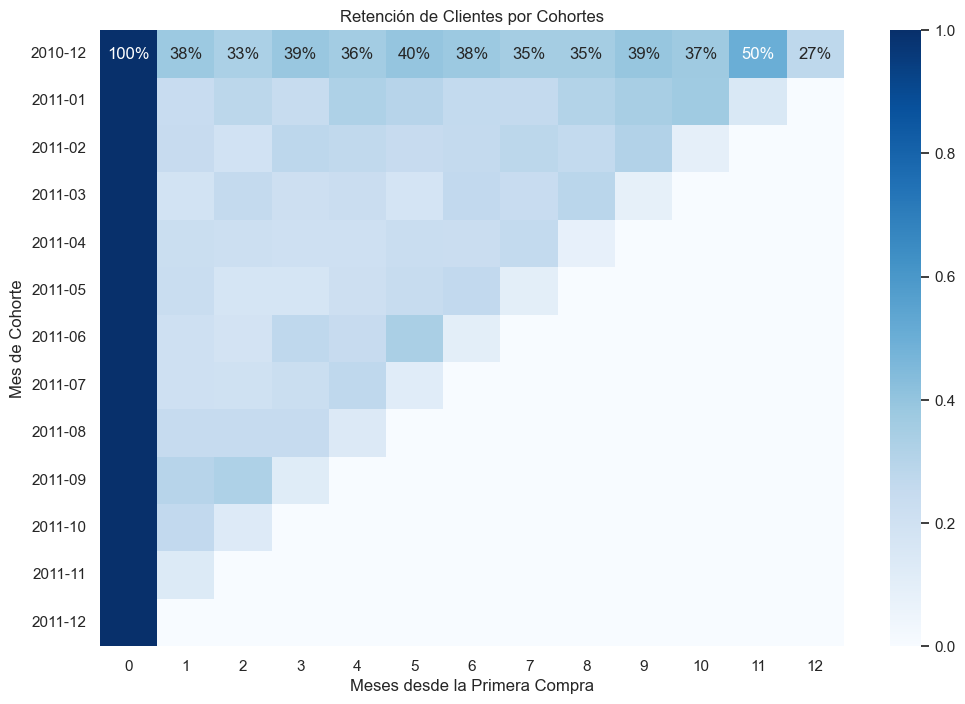

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
data_filepath = '..data/data.csv'
data = pd.read_csv(data_filepath, encoding='ISO-8859-1')

# Convertir la columna 'InvoiceDate' a formato de fecha
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Crear una nueva columna para el año y el mes de la primera compra de cada cliente
data['CohortMonth'] = data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

# Crear una nueva columna para el año y el mes de la compra
data['InvoiceMonth'] = data['InvoiceDate'].dt.to_period('M')

# Asegurarse de que no hay valores nulos en 'CohortMonth' y 'InvoiceMonth'
data = data.dropna(subset=['CohortMonth', 'InvoiceMonth'])

# Crear una columna con la diferencia en meses desde la primera compra
data['CohortIndex'] = (data['InvoiceMonth'] - data['CohortMonth']).apply(lambda x: x.n if not pd.isnull(x) else 0)

# Pivotar la tabla para crear el mapa de calor de retención de clientes
cohort_data = data.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].apply(pd.Series.nunique).unstack().fillna(0)
cohort_size = cohort_data.iloc[:, 0]
retention = cohort_data.divide(cohort_size, axis=0)

# Visualización del análisis de cohortes
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='Blues')
plt.title('Retención de Clientes por Cohortes')
plt.xlabel('Meses desde la Primera Compra')
plt.ylabel('Mes de Cohorte')
plt.show()



## Conclusiones

El análisis de cohortes y su visualización permiten comprender mejor el comportamiento de los clientes a lo largo del tiempo. Identificar patrones de retención puede ayudar a las empresas a ajustar sus estrategias de marketing y mejorar la experiencia del cliente, fomentando una mayor lealtad y, en última instancia, incrementando las ventas.


In [47]:
import pandas as pd
import os

# Ruta absoluta al archivo data.csv
data_filepath = '..data/data.csv'

# Verificar si el archivo existe
if not os.path.exists(data_filepath):
    print(f"El archivo {data_filepath} no existe. Verifica la ruta.")
else:
    # Cargar el dataset
    data = pd.read_csv(data_filepath, encoding='ISO-8859-1')

    # Mostrar el encabezado de la tabla
    print(data.head())

    # Mostrar el esquema de las columnas si son muchas
    print(data.columns)


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')
